
# Project: Investigate a TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I am going to explore and investigate the TMDb Movie dataset. The dataset contains information about 10,000 movie. You can view the description of this dataset on the Kaggle website where I download it there https://www.kaggle.com/tmdb/tmdb-movie-metadata.
>

<a id='questions'></a>
## Questions

> 1. What is the highest revenue and the lowest revenue in dataset ?
> 2. What is the highest budget and the lowest budget in dataset ? 
> 3. What is the top year that have the most relaesing movies ?
> 4. What is the total profit for each year ?
> 5. What is the relation between revenue and profit ?
> 6. Which genres are the most popular of all time?


#### Importing Packing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [5]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> We will consider all the currency in dataset as dollar.

In [6]:
# we want to see the numbers of rows
df.shape

(10866, 21)

In [7]:
# we want to have overview what we have in dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# we wnat to know data type for each columns and number of uniqes value we have in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
# number of duplicate in dataset
sum(df.duplicated())

1

In [10]:
# number of null values in dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# as we show earlier in describe step
# the min Value shows 0 for budget, revenue and runtime
# we need to find number of rows which contain 0 for these columns
# number of raws which has 0 value for budget
sum(df["budget"]==0)

5696

In [12]:
# number of raws which has 0 value for revenue
sum(df["revenue"]==0)

6016

In [13]:
# number of raws which has 0 value for runtime
sum(df["runtime"]==0)

31

### Data Cleaning (modify and drop some data from dataset)
#### Here some points needs to change:
> 1. remove duplicate value. 
> 2. remove the unnecessarily coloums (such as imdb_id, homepage..)
> 3. remove all rows which has 0 values in budget, revenue and runtime.
> 4. change the type of release date form objective to datetime.
> 5. change budget and revenue from float to int.

#### 1. remove duplicate value.
> as we show in general Properties, we found that we have 1 duplicate value.

In [14]:
# Here we will drop all the duplicate value in dataset 
# here the reference https://jamesrledoux.com/code/drop_duplicates
df = df.drop_duplicates()
sum(df.duplicated())

0

In [15]:
# Now we check the number of entries 
# is become 10865
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

#### 2. remove the unnecessarily coloums 
> we will remove these columns ( imdb_id , cast , homepage , director , tagline , keywords , overview , production_companies , budget_adj , revenue_adj )

In [16]:
# drop all the columns 
df = df.drop(columns=['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'])

# here the reference https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

# show
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   runtime         10865 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1018.6+ KB


#### 3. remove all rows which has 0 values in budget, revenue and runtime.
> These 0 values will defect my research and my test, droping these value to make the research accurate. 

In [17]:
# Changing all the 0 to NaN
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df['runtime'] = df['runtime'].replace(0, np.NaN)

df.isnull().sum()

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
runtime             31
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

In [18]:
# Drop NaN from budget , revenue and runtime
# here the reference https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
df = df.dropna(subset=['budget', 'revenue','runtime'])

df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3854 non-null   int64  
 1   popularity      3854 non-null   float64
 2   budget          3854 non-null   float64
 3   revenue         3854 non-null   float64
 4   original_title  3854 non-null   object 
 5   runtime         3854 non-null   float64
 6   genres          3854 non-null   object 
 7   release_date    3854 non-null   object 
 8   vote_count      3854 non-null   int64  
 9   vote_average    3854 non-null   float64
 10  release_year    3854 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 361.3+ KB


#### 4 .change the type of release date form objective to datetime.

In [20]:
# change release_date from object to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   float64       
 3   revenue         3854 non-null   float64       
 4   original_title  3854 non-null   object        
 5   runtime         3854 non-null   float64       
 6   genres          3854 non-null   object        
 7   release_date    3854 non-null   datetime64[ns]
 8   vote_count      3854 non-null   int64         
 9   vote_average    3854 non-null   float64       
 10  release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 361.3+ KB


#### 5 .change the type of release date form objective to datetime

> make it easier to read with out fraction

In [22]:
# change budget from float64 to int64
# here the reference https://www.kite.com/python/answers/how-to-convert-floats-to-integers-with-pandas-in-python
# https://stackoverflow.com/questions/43956335/convert-float64-column-to-int64-in-pandas
df['budget'] = df['budget'].astype(np.int64)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   int64         
 3   revenue         3854 non-null   float64       
 4   original_title  3854 non-null   object        
 5   runtime         3854 non-null   float64       
 6   genres          3854 non-null   object        
 7   release_date    3854 non-null   datetime64[ns]
 8   vote_count      3854 non-null   int64         
 9   vote_average    3854 non-null   float64       
 10  release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 361.3+ KB


In [24]:
# change revenue from float64 to int64
df['revenue'] = df['revenue'].astype(np.int64)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   int64         
 3   revenue         3854 non-null   int64         
 4   original_title  3854 non-null   object        
 5   runtime         3854 non-null   float64       
 6   genres          3854 non-null   object        
 7   release_date    3854 non-null   datetime64[ns]
 8   vote_count      3854 non-null   int64         
 9   vote_average    3854 non-null   float64       
 10  release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 361.3+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question : 1. What is the highest revenue and the lowest revenue in dataset ?

In [26]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# here we used idxmax to find max value
# here the reference https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmax.html
max_value = df['revenue'].idxmax()
max_details = pd.DataFrame(df.loc[max_value])
        
min_value = df['revenue'].idxmin()
min_details = pd.DataFrame(df.loc[min_value])
       
pd.concat([max_details, min_details], axis=1)

,1386,5067
id,19995,13537
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
vote_count,8458,46
vote_average,7.1,6.4


> it shows that the highest revenue is Avatar with 2781505847
> and the lowest revenue is Shattered Glass with 2


### Research Question : 2 .What is the highest budget and the lowest budget in dataset ? 

In [27]:
max_value = df['budget'].idxmax()
max_details = pd.DataFrame(df.loc[max_value])
        
min_value = df['budget'].idxmin()
min_details = pd.DataFrame(df.loc[min_value])
       
pd.concat([max_details, min_details], axis=1)

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
vote_count,74,14
vote_average,6.4,4.8


> it shows that the highest budget is The Warrior's Way with 425000000 and the lowest budget is Lost & Found  with 1.



### Research Question : 3 .What is the top year that have the most relaesing movies ?

In [34]:
# create a function that create figure
def set_label(title,xlabel,ylabel,color):
    # Set figure size
    plt.figure(figsize=(9,5))
    # Set name of the graph
    plt.title(title,fontsize = 16)
    # Set x-axis
    plt.xlabel(xlabel,fontsize = 14)
    # Set y-axis
    plt.ylabel(ylabel,fontsize = 14)
    # set a style
    # here the reference https://seaborn.pydata.org/generated/seaborn.set.html
    sns.set(style=color,)
    return 0

release_year
1960     5
1961    10
1962     7
1963     6
1964     7
Name: original_title, dtype: int64
release_year
2011    199
2012    158
2013    180
2014    165
2015    160
Name: original_title, dtype: int64


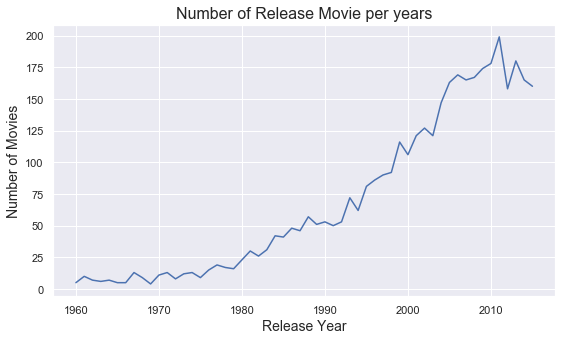

In [40]:
# gropby all movies that release in same year
data=df.groupby('release_year').count()['original_title']
# check the first year and last year
print(data.head())
print(data.tail())

# calling function we create it earlier
set_label('Number of Release Movie per years','Release Year','Number of Movies','darkgrid')

# Set plot
plt.plot(data)
# here the reference https://www.geeksforgeeks.org/python-matplotlib-pyplot-ticks/
plt.show()

> as shown in the figure, The most year that release movie was 2011 with 199 movie.

### Research Question : 4 .What is the total profit for each year ?

In [29]:
# First we need to add a new column for the profit
df['profit'] = df['revenue'] - df['budget']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   int64         
 3   revenue         3854 non-null   int64         
 4   original_title  3854 non-null   object        
 5   runtime         3854 non-null   float64       
 6   genres          3854 non-null   object        
 7   release_date    3854 non-null   datetime64[ns]
 8   vote_count      3854 non-null   int64         
 9   vote_average    3854 non-null   float64       
 10  release_year    3854 non-null   int64         
 11  profit          3854 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 551.4+ KB


release_year
1960    108198052
1961    299083188
1962    166879846
1963    115411882
1964    294678387
Name: profit, dtype: int64
release_year
2011    14966694704
2012    16596845507
2013    15782743325
2014    16676201357
2015    19032145273
Name: profit, dtype: int64


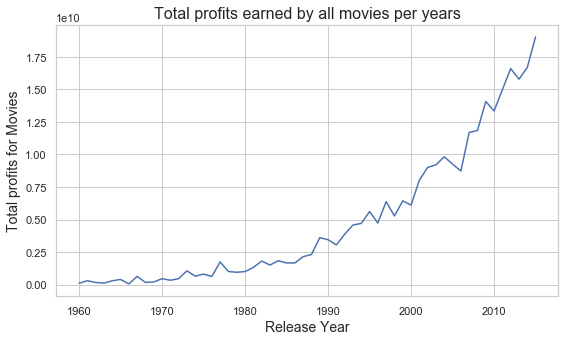

In [38]:
# sum profit for each year
profit_year = df.groupby("release_year").sum()['profit']
print(profit_year.head())
print(profit_year.tail())

# calling set_label function
set_label("Total profits earned by all movies per years","Release Year",'Total profits for Movies',"whitegrid")

# Set plot
plt.plot(profit_year)
plt.show()

> as shown from figure, In 2015 has the most profit in all the years with 19,032,145,273$

### Research Question : 5 .What is the relation between revenue and profit ?

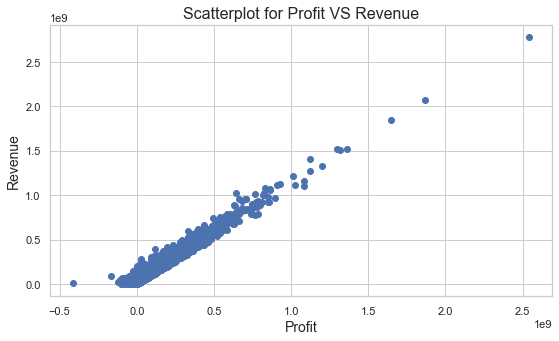

Correlation between profit and revenue =  0.9791333955736232


In [66]:
#how does profit change according to their revenue
#we will use scatter plot by using scatter between profit and budget
# calling set_label function
set_label("Scatterplot for Profit VS Revenue",'Profit','Revenue',"whitegrid")

# Set scatterplot
# here the reference https://www.w3schools.com/python/python_ml_scatterplot.asp
plt.scatter(df['profit'],df['revenue'])
plt.show()
# Set a function to find correlation  
# here the reference https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
cr = df.corr()
# Find correlation between profit and revenue
print("Correlation between profit and revenue = ",cr.loc['profit','revenue'])

> The relation between profit and revenue have Positive correlation(0.97) is very strong relation and nearly perfect relation. When revenue is high it will be a high profit.

### Research Question : 6 .Which genres are the most popular of all time?

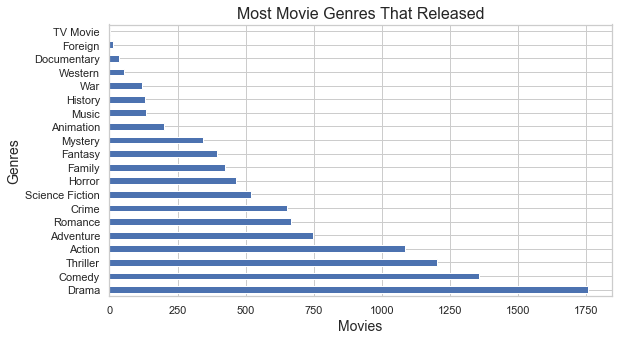

In [101]:
# First we need split the string and return each genre alone.
# we will use concatenate all the rows of the genrs.

# here the reference https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/
data_genres = df['genres'].str.cat(sep = '|')
data = pd.Series(data_genres.split('|'))

# Calling set_label function
set_label("Most Movie Genres That Released",'Movies','Genres',"whitegrid")

# Create bar chart 
# here the reference https://mode.com/python-tutorial/counting-and-plotting-in-python/
data.value_counts().plot(kind='barh')


> As is shown in bar chart, the most genres have alot of movies is drama type, come in second place comedy movie genre.

<a id='conclusions'></a>
## Conclusions

> **In the end, I would like summarize some points from the results I got:**
> 1. Year by year there are more movies are releasing.
> 2. From 1960 to 1990, the profit is slightly increase.
> 3. From 1990 to 2015, the profit have a dramatic increase.
> 4. "The Warrior's Way" is the most budget movie.
> 5. "Avatar" is the most revenue movie.
> 6. Profit and revenue are nearly the same.
> 7. The most genres have alot of movies is drama.

> In the cleaning step, I used to drop some null values and I didn't try to fix these issues which make this analysis not 100% correct. If we want to have more accurate we suppose to fix these data and fill it. 

